In [11]:
import numpy as np
import pandas as pd

In [12]:
df = pd.read_csv('merged_df.csv')
df.head()

,Unnamed: 0,time,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,...,total load forecast,total load actual,price day ahead,price actual,temp,humidity,pressure,wind_speed,rain_1h,clouds_all
0,0,2014-12-31 23:00:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,...,26118.0,25385.0,50.10,65.41,272.491463,82.4,1016.4,2.0,0.0,0.0
1,1,2015-01-01 00:00:00,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,...,24934.0,24382.0,48.10,64.92,272.512700,82.4,1016.2,2.0,0.0,0.0
2,2,2015-01-01 01:00:00,448.0,323.0,4857.0,4581.0,157.0,1164.0,973.0,1371.0,...,23515.0,22734.0,47.33,64.48,272.099137,82.0,1016.8,2.4,0.0,0.0
3,3,2015-01-01 02:00:00,438.0,254.0,4314.0,4131.0,160.0,1503.0,949.0,779.0,...,22642.0,21286.0,42.27,59.32,272.089469,82.0,1016.6,2.4,0.0,0.0
4,4,2015-01-01 03:00:00,428.0,187.0,4130.0,3840.0,156.0,1826.0,953.0,720.0,...,21785.0,20264.0,38.41,56.04,272.145900,82.0,1016.6,2.4,0.0,0.0


In [13]:

df = df.drop(columns=['Unnamed: 0'], errors='ignore')
df['time'] = pd.to_datetime(df['time'])
df = df.sort_values('time').set_index('time')

# --- Define features and target ---
features = df.drop(columns=['total load actual'])
target = df[['total load actual']]

# --- Scale features and target ---
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(features)
y_scaled = scaler_y.fit_transform(target)


In [14]:
import os
import random
import numpy as np

# Set global seed
SEED = 42

# Python & NumPy
random.seed(SEED)
np.random.seed(SEED)

# LSTM

In [15]:
lookback = 24
X_seq, y_seq = [], []

for i in range(lookback, len(X_scaled)):
    X_seq.append(X_scaled[i - lookback:i])
    y_seq.append(y_scaled[i])

X_seq = np.array(X_seq)
y_seq = np.array(y_seq)

print("X_seq:", X_seq.shape, " y_seq:", y_seq.shape)


X_seq: (35040, 24, 25)  y_seq: (35040, 1)


In [16]:
train_size = int(len(X_seq) * 0.8)
X_train, X_test = X_seq[:train_size], X_seq[train_size:]
y_train, y_test = y_seq[:train_size], y_seq[train_size:]

print("Train:", X_train.shape, " Test:", X_test.shape)


Train: (28032, 24, 25)  Test: (7008, 24, 25)


In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model_lstm = Sequential([
    LSTM(64, activation='tanh', input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(1)
])

model_lstm.compile(optimizer='adam', loss='mse')

history = model_lstm.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.1,
    verbose=1
)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
789/789 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - loss: 0.0158 - val_loss: 0.0023
Epoch 2/20
789/789 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - loss: 0.0019 - val_loss: 0.0019
Epoch 3/20
789/789 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - loss: 0.0015 - val_loss: 0.0016
Epoch 4/20
789/789 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - loss: 0.0013 - val_loss: 0.0015
Epoch 5/20
789/789 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - loss: 0.0013 - val_loss: 0.0013
Epoch 6/20
789/789 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - loss: 0.0012 - val_loss: 0.0013
Epoch 7/20
789/789 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - loss: 0.0010 - val_loss: 0.0012
Epoch 8/20
789/789 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 9/20
789/789 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - loss: 9.9324e-04 - val_loss: 0.0011
Epoch 10/20
789/789 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - loss: 9.4779e-04 - val_loss: 0.0013
Epoch 11/20
789/789 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - loss: 8.9147e-04 - val_loss: 0.0010
Epoch 12/20
789/789

In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = model_lstm.predict(X_test)

# Inverse scale
y_test_inv = scaler_y.inverse_transform(y_test)
y_pred_inv = scaler_y.inverse_transform(y_pred)

# Metrics
mae = mean_absolute_error(y_test_inv, y_pred_inv)
rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
mape = np.mean(np.abs((y_test_inv - y_pred_inv) / y_test_inv)) * 100
r2 = r2_score(y_test_inv, y_pred_inv)

print("\n📊 LSTM (Inverse-Scaled) Performance:")
print(f"MAE : {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")
print(f"R²  : {r2:.3f}")


219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step

📊 LSTM (Inverse-Scaled) Performance:
MAE : 475.16
RMSE: 643.50
MAPE: 1.67%
R²  : 0.980


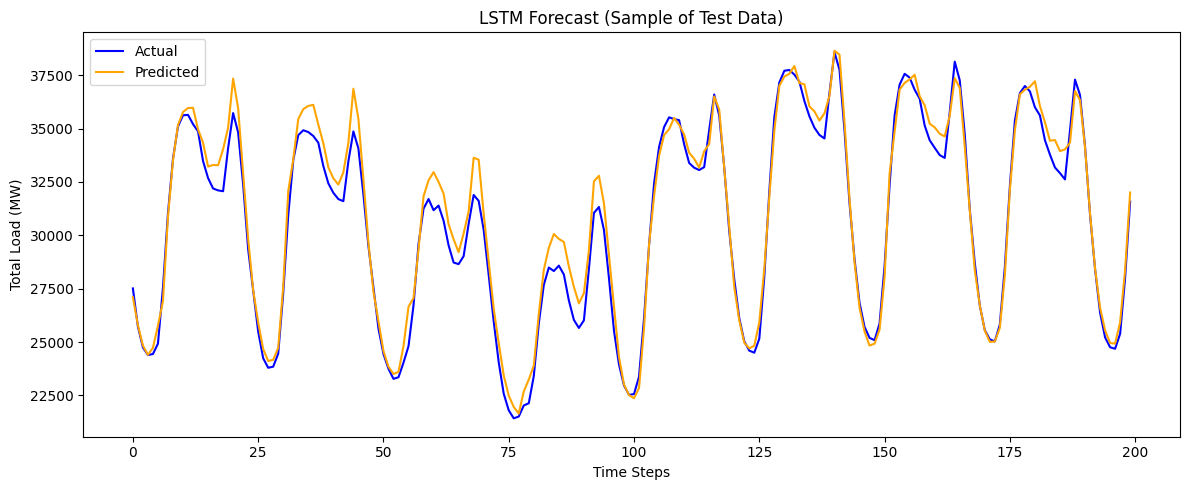

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(y_test_inv[:200], label='Actual', color='blue')
plt.plot(y_pred_inv[:200], label='Predicted', color='orange')
plt.title('LSTM Forecast (Sample of Test Data)')
plt.xlabel('Time Steps')
plt.ylabel('Total Load (MW)')
plt.legend()
plt.tight_layout()
plt.show()
